<a href="https://colab.research.google.com/github/lauguicor/CSS145_Group3_Project/blob/main/Final_CSS145_Group3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 3, Section BM7

Members:


*   LANCE NATHANIEL B. MACALALAD
*   RUSKIN GIAN A. LAUGUICO
*   MARC DAVE D. CONSTANTINO
*   CRAIG ZYRUS B. MANUEL
*   JEAN L. LOPEZ

---

**ABOUT**
The project will focus on Customer prediction, to be more specific, the most purchased product (Given by the dataset). The group decisded to use K-Means Clustering and Decision Tree to predict our data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import builtins
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

if 'sc' in locals():
    sc.stop()

conf = SparkConf().setAppName("MyApp").setMaster("local")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [ ]:
!pip install opendatasets --upgrade
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis")

Skipping, found downloaded files in "./customer-personality-analysis" (use force=True to force download)


In [ ]:
dataset_df = spark.read.format("csv").option("delimiter", "\t").option("header", "true").load("customer-personality-analysis/marketing_campaign.csv")
dataset_df.createOrReplaceTempView("mkt_campaign")
dataset_df.show()
print("Total Rows:",dataset_df.count(),"\n")

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

In [ ]:
null_df = spark.sql("select * from mkt_campaign where \
ID IS NULL OR \
year_birth IS NULL OR \
education IS NULL OR \
marital_status IS NULL OR \
income IS NULL OR \
kidhome IS NULL OR \
teenhome IS NULL OR \
dt_customer IS NULL OR \
recency IS NULL OR \
mntwines IS NULL OR \
mntfruits IS NULL OR \
mntmeatproducts IS NULL OR \
mntfishproducts IS NULL OR \
mntsweetproducts IS NULL OR \
mntgoldprods IS NULL OR \
numdealspurchases IS NULL OR \
numwebpurchases IS NULL OR \
numcatalogpurchases IS NULL OR \
numstorepurchases IS NULL OR \
numwebvisitsmonth IS NULL OR \
acceptedcmp3 IS NULL OR \
acceptedcmp4 IS NULL OR \
acceptedcmp5 IS NULL OR \
acceptedcmp1 IS NULL OR \
acceptedcmp2 IS NULL OR \
complain IS NULL OR \
z_costcontact IS NULL OR \
z_revenue IS NULL OR \
response IS NULL")


null_df.show()

print("Total Rows:",dataset_df.count())
print("Total Null rows:", null_df.count(),"\n")

+-----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|   ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+-----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+-------

In [ ]:
clean_df = spark.sql("select * from mkt_campaign where \
ID IS NOT NULL AND \
year_birth IS NOT NULL AND \
education IS NOT NULL AND \
marital_status IS NOT NULL AND \
income IS NOT NULL AND \
kidhome IS NOT NULL AND \
teenhome IS NOT NULL AND \
dt_customer IS NOT NULL AND \
recency IS NOT NULL AND \
mntwines IS NOT NULL AND \
mntfruits IS NOT NULL AND \
mntmeatproducts IS NOT NULL AND \
mntfishproducts IS NOT NULL AND \
mntsweetproducts IS NOT NULL AND \
mntgoldprods IS NOT NULL AND \
numdealspurchases IS NOT NULL AND \
numwebpurchases IS NOT NULL AND \
numcatalogpurchases IS NOT NULL AND \
numstorepurchases IS NOT NULL AND \
numwebvisitsmonth IS NOT NULL AND \
acceptedcmp3 IS NOT NULL AND \
acceptedcmp4 IS NOT NULL AND \
acceptedcmp5 IS NOT NULL AND \
acceptedcmp1 IS NOT NULL AND \
acceptedcmp2 IS NOT NULL AND \
complain IS NOT NULL AND \
z_costcontact IS NOT NULL AND \
z_revenue IS NOT NULL AND \
response IS NOT NULL")
clean_df.createOrReplaceTempView("cln_mkt_campaign")


clean_df.show()
print("Total Rows:",dataset_df.count())
print("Total Null rows:", null_df.count())
print("Total Not Null rows:", clean_df.count(),"\n")
clean_pd = clean_df.toPandas()


+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

In [ ]:
#Cast columns to proper data types, eliminate unneeded columns
data_df = spark.sql("""
  SELECT
    CAST(ID AS BIGINT) AS ID,
    year(make_date(CAST(Year_Birth AS INT), 1, 1)) AS Year_Birth,
    Education,
    Marital_Status,
    CAST(Income AS DOUBLE) AS Income,
    CAST(Kidhome AS INT) AS Kidhome,
    CAST(Teenhome AS INT) AS Teenhome,
    to_date(Dt_Customer, 'dd-MM-yyyy') AS Dt_Customer,
    CAST(Recency AS INT) AS Recency,
    CAST(MntWines AS DOUBLE) AS MntWines,
    CAST(MntFruits AS DOUBLE) AS MntFruits,
    CAST(MntMeatProducts AS DOUBLE) AS MntMeatProducts,
    CAST(MntFishProducts AS DOUBLE) AS MntFishProducts,
    CAST(MntSweetProducts AS DOUBLE) AS MntSweetProducts,
    CAST(MntGoldProds AS DOUBLE) AS MntGoldProds,
    CAST(NumDealsPurchases AS INT) AS NumDealsPurchases,
    CAST(NumWebPurchases AS INT) AS NumWebPurchases,
    CAST(NumCatalogPurchases AS INT) AS NumCatalogPurchases,
    CAST(NumStorePurchases AS INT) AS NumStorePurchases,
    CAST(NumWebVisitsMonth AS INT) AS NumWebVisitsMonth
  FROM cln_mkt_campaign
""")
data_pd = data_df.toPandas()
data_df.show()

+----+----------+----------+--------------+-------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+
|  ID|Year_Birth| Education|Marital_Status| Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|
+----+----------+----------+--------------+-------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+
|5524|      1957|Graduation|        Single|58138.0|      0|       0| 2012-09-04|     58|   635.0|     88.0|          546.0|          172.0|            88.0|        88.0|                3|              8|                 

In [ ]:
print(data_pd.dtypes)

ID                       int64
Year_Birth               int32
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int32
Teenhome                 int32
Dt_Customer             object
Recency                  int32
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases        int32
NumWebPurchases          int32
NumCatalogPurchases      int32
NumStorePurchases        int32
NumWebVisitsMonth        int32
dtype: object


In [ ]:
#calculate total sales per product
prodsales_df = data_df.select(
    sum(data_df.MntWines).alias("MntWines"),
    sum(data_df.MntFruits).alias("MntFruits"),
    sum(data_df.MntMeatProducts).alias("MntMeatProducts"),
    sum(data_df.MntFishProducts).alias("MntFishProducts"),
    sum(data_df.MntSweetProducts).alias("MntSweetProducts"),
    sum(data_df.MntGoldProds).alias("MntGoldProds")
)
prodsales_pd = prodsales_df.toPandas()

prodsales_pivot = prodsales_pd.melt(var_name="Product", value_name="TotalSales")
display(prodsales_pivot)

,Product,TotalSales
0,MntWines,676083.0
1,MntFruits,58405.0
2,MntMeatProducts,370063.0
3,MntFishProducts,83405.0
4,MntSweetProducts,59896.0
5,MntGoldProds,97427.0


<ipython-input-10-b5f064a2e57f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='TotalSales', data=prodsales_pivot, palette='viridis')


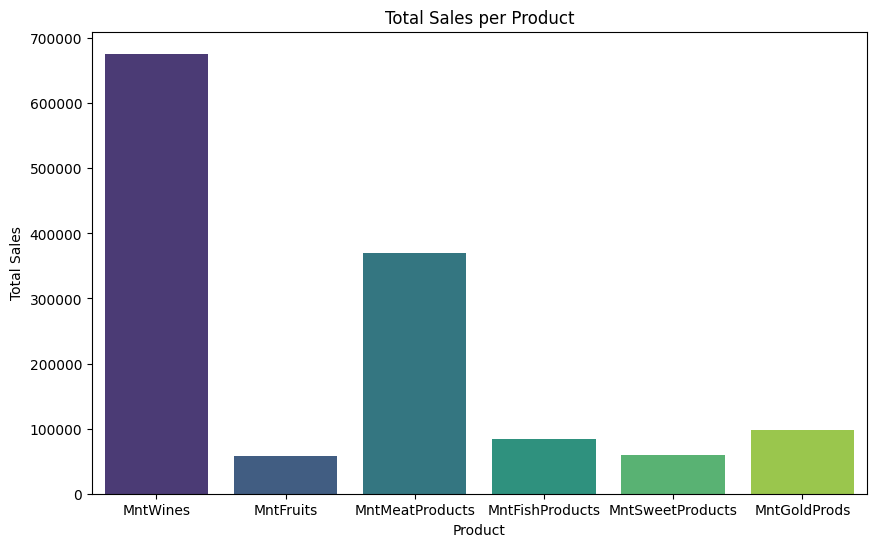

In [ ]:
# Plot using Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='TotalSales', data=prodsales_pivot, palette='viridis')

# Adding labels and title
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

Text(0.5, 1.0, 'Correlation on Income vs Product Spending')

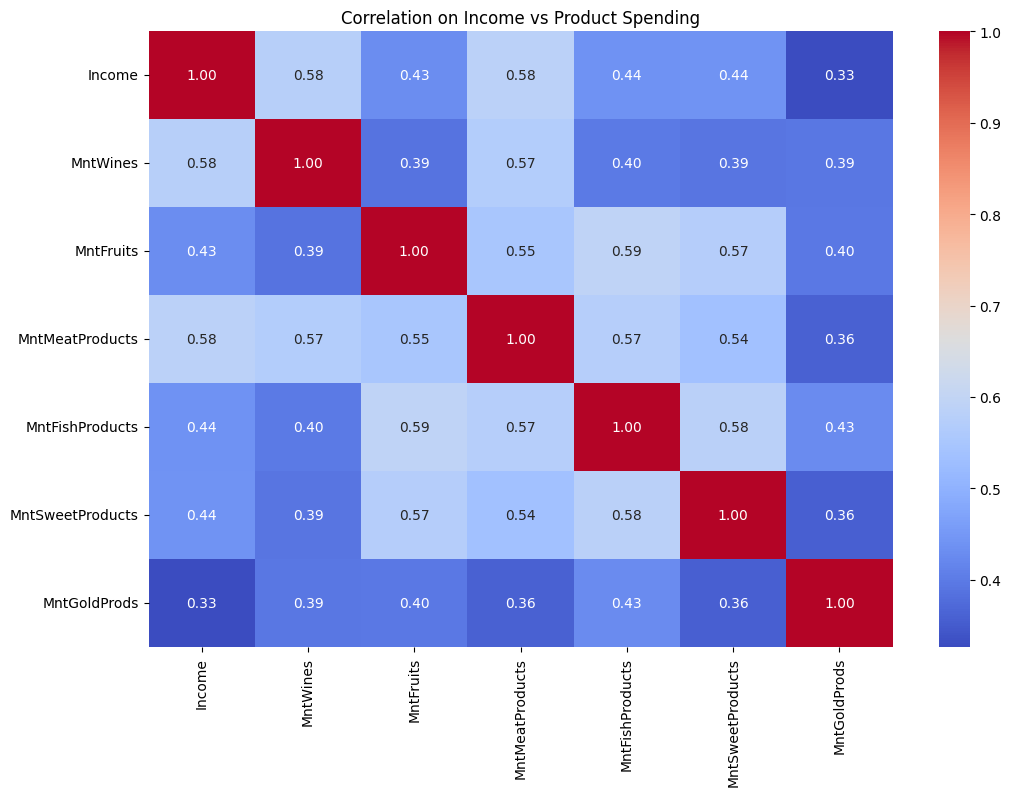

In [ ]:
#use heatmap to correlate the data
heatmap_pd = data_pd[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
correlation_matrix = heatmap_pd.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation on Income vs Product Spending")

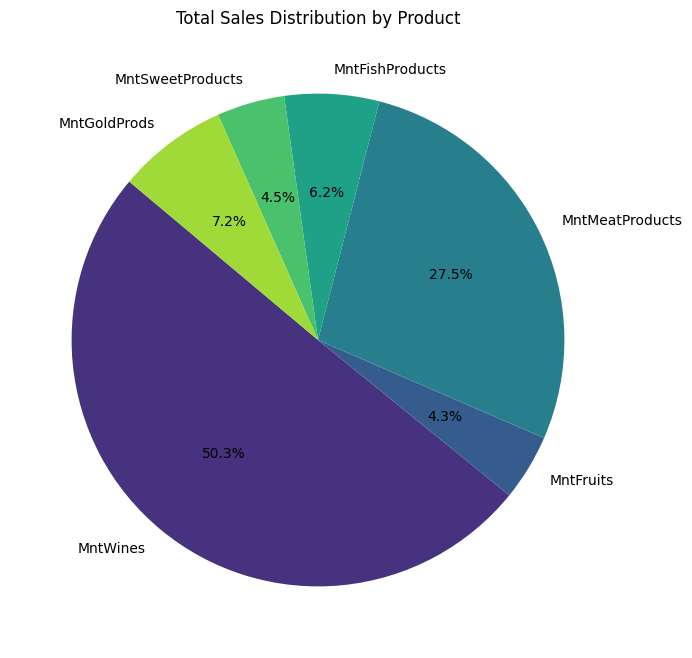

In [ ]:
#use a pie chart to show the sales distribution of purchases per product
plt.figure(figsize=(8, 8))
plt.pie(prodsales_pivot['TotalSales'], labels=prodsales_pivot['Product'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))

plt.title('Total Sales Distribution by Product')
plt.show()

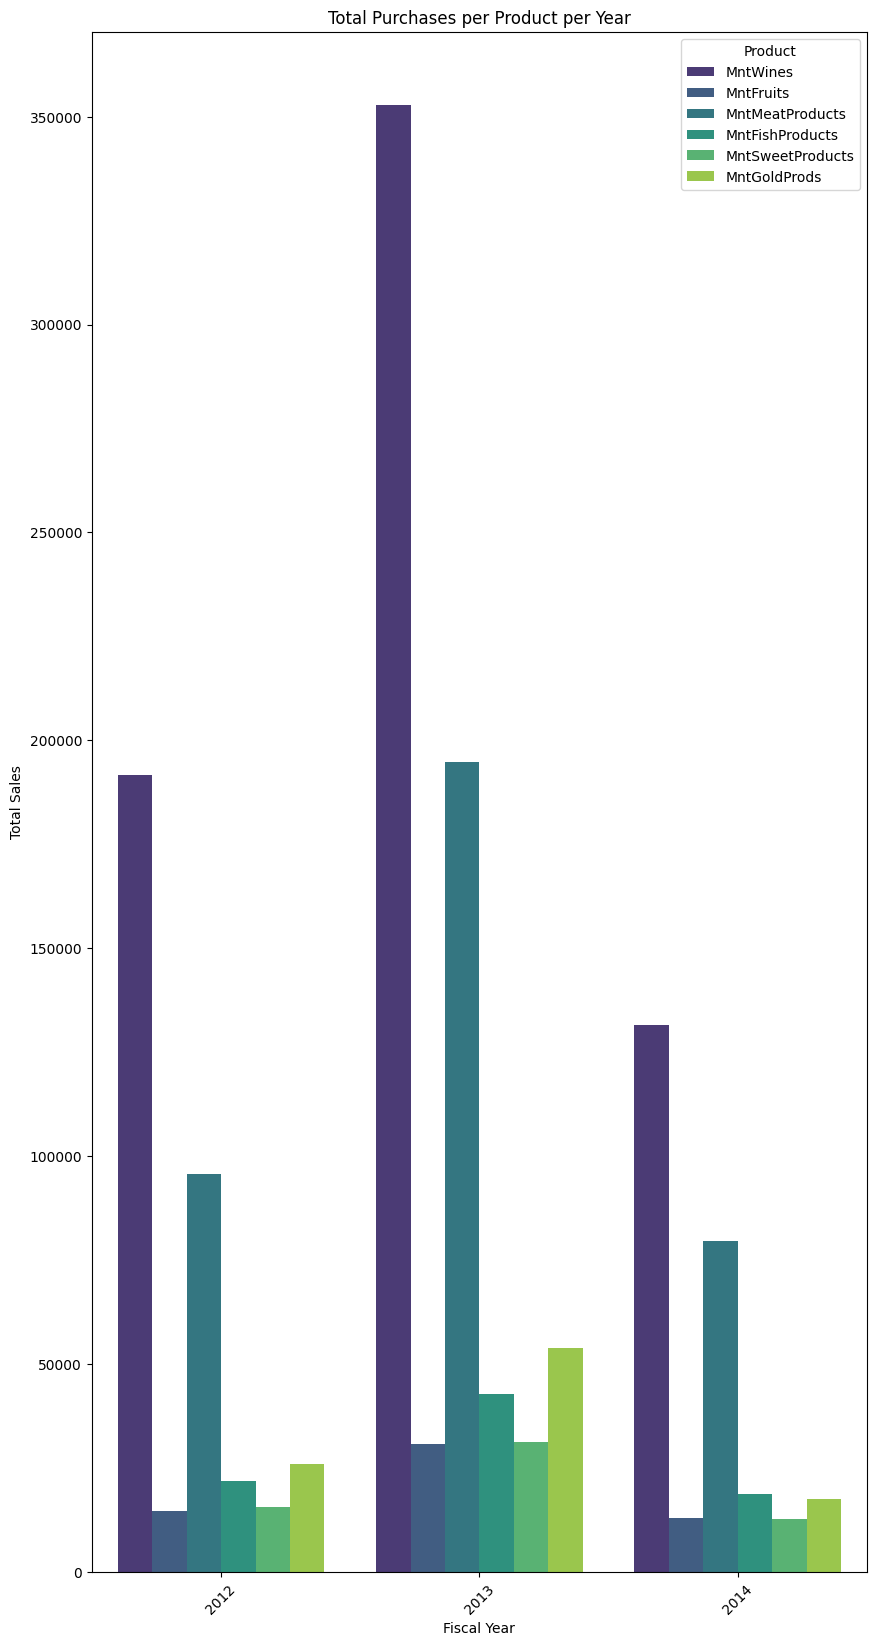

In [ ]:
#sum all purchases per product per year
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
year_purchase_df = data_df.groupBy(year("Dt_Customer").alias("FiscalYear")).agg(
    sum(data_df.MntWines).alias("MntWines"),
    sum(data_df.MntFruits).alias("MntFruits"),
    sum(data_df.MntMeatProducts).alias("MntMeatProducts"),
    sum(data_df.MntFishProducts).alias("MntFishProducts"),
    sum(data_df.MntSweetProducts).alias("MntSweetProducts"),
    sum(data_df.MntGoldProds).alias("MntGoldProds")
)
year_purchase_pd = year_purchase_df.toPandas()

pivot_year = year_purchase_pd.melt(id_vars=["FiscalYear"],
                             value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                             var_name="Product",
                             value_name="TotalSales")

plt.figure(figsize=(10, 20))
sns.barplot(x="FiscalYear", y="TotalSales", data=pivot_year, hue="Product", palette='viridis')

plt.title('Total Purchases per Product per Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

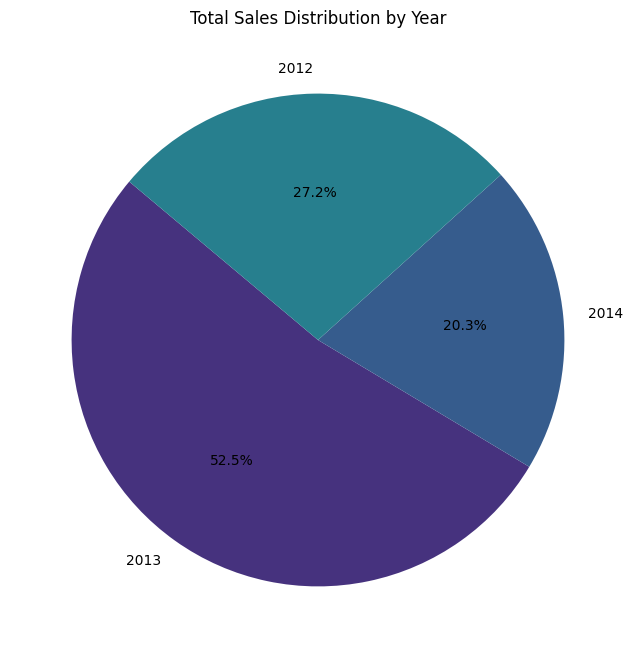

In [ ]:
#sum all purchases per year for pie chart
year_purchase_df = data_df.groupBy(year("Dt_Customer").alias("FiscalYear")).agg((sum("MntWines") + sum("MntFruits") + sum("MntMeatProducts") +
     sum("MntFishProducts") + sum("MntSweetProducts") + sum("MntGoldProds")
    ).alias("TotalSales")
)
year_purchase_pd = year_purchase_df.toPandas()

plt.figure(figsize=(8, 8))
plt.pie(year_purchase_pd['TotalSales'], labels=year_purchase_pd['FiscalYear'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))

plt.title('Total Sales Distribution by Year')
plt.show()

In [ ]:
#sum all product purchases by marital status
marital_purchase_df = data_df.groupBy("Marital_Status").agg(
    (sum("MntWines") + sum("MntFruits") + sum("MntMeatProducts") +
     sum("MntFishProducts") + sum("MntSweetProducts") + sum("MntGoldProds")
    ).alias("TotalSales")
)
marital_purchase_df.show()
marital_purchase_pd = marital_purchase_df.toPandas()

+--------------+----------+
|Marital_Status|TotalSales|
+--------------+----------+
|          YOLO|     848.0|
|      Together|  348869.0|
|       Married|  506885.0|
|        Absurd|    2385.0|
|         Widow|   55325.0|
|      Divorced|  141666.0|
|         Alone|     770.0|
|        Single|  288531.0|
+--------------+----------+



<ipython-input-16-b46af5dff883>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='TotalSales', data=marital_purchase_pd, palette='viridis')


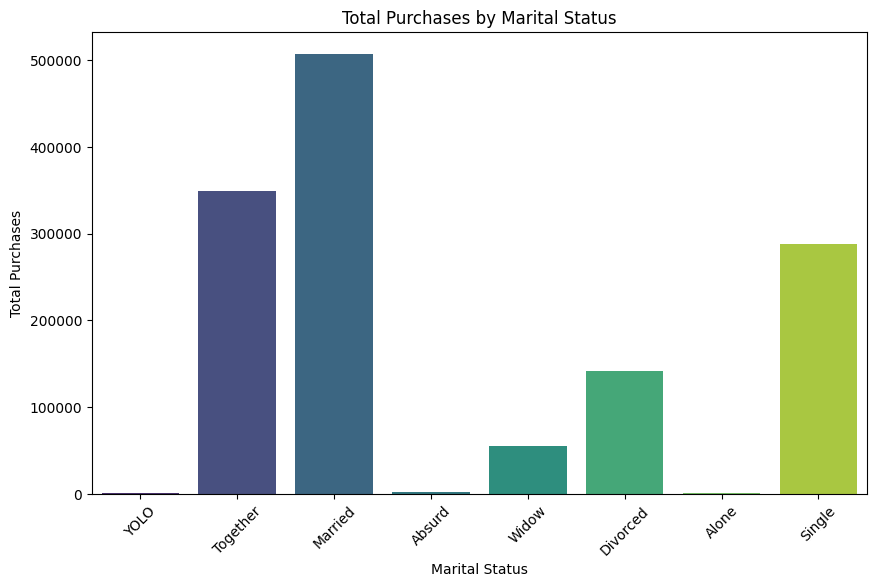

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='TotalSales', data=marital_purchase_pd, palette='viridis')

plt.title('Total Purchases by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Unsupervised Machine Learning K-means Clustering Method
kmeans_pd = data_pd

#Label Encoder since KMeans does not allow non-numeric values
columns_to_encode = ['Year_Birth','Marital_Status', 'Education', "Dt_Customer"]
label_encoders = {}

# Apply LabelEncoder and store each encoder in the dictionary
for col in columns_to_encode:
    le = LabelEncoder()
    kmeans_pd[col] = le.fit_transform(kmeans_pd[col])
    label_encoders[col] = le  # Store the encoder

#Get the columns needed for scaling
kmeans_df = kmeans_pd[['ID','Year_Birth', 'Education','Marital_Status', 'Dt_Customer', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [ ]:
#apply scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(kmeans_df)

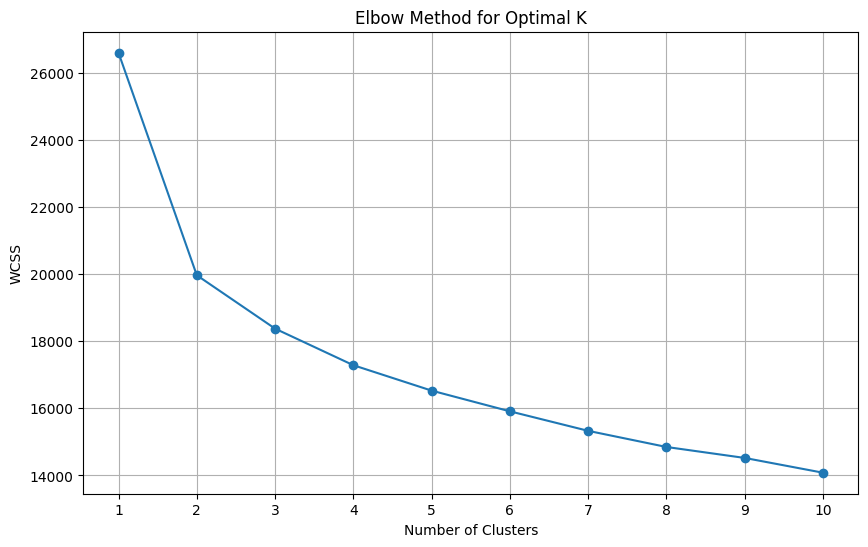

In [ ]:
# Elbow Method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [ ]:
#Using the optimal number of cluster based on the elbow method above
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pd['Cluster'] = kmeans.fit_predict(scaled)

In [ ]:
cluster_summary = kmeans_pd.groupby('Cluster').mean()
print(cluster_summary)

                  ID  Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                     
0        5570.275894   33.975252   2.221815        3.677360  35516.011916   
1        5583.235294   31.204934   2.151803        3.740038  76019.341556   
2        5625.844482   24.938127   2.921405        3.802676  61822.319398   

          Kidhome  Teenhome  Dt_Customer    Recency    MntWines  MntFruits  \
Cluster                                                                      
0        0.759853  0.485793   357.867094  48.985335   56.080660   5.828598   
1        0.064516  0.271347   300.187856  49.703985  560.149905  76.914611   
2        0.193980  0.747492   298.312709  48.453177  534.615385  19.250836   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              27.725023         8.054995          5.793767     15.89

In [ ]:
#Decode The Columns
kmeans_pd['Year_Birth'] = label_encoders['Year_Birth'].inverse_transform(kmeans_pd['Year_Birth'])
kmeans_pd['Marital_Status'] = label_encoders['Marital_Status'].inverse_transform(kmeans_pd['Marital_Status'])
kmeans_pd['Education'] = label_encoders['Education'].inverse_transform(kmeans_pd['Education'])
kmeans_pd['Dt_Customer'] = label_encoders['Dt_Customer'].inverse_transform(kmeans_pd['Dt_Customer'])
print(kmeans_pd)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2211  10870        1967  Graduation        Married  61223.0        0   
2212   4001        1946         PhD       Together  64014.0        2   
2213   7270        1981  Graduation       Divorced  56981.0        0   
2214   8235        1956      Master       Together  69245.0        0   
2215   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntMeatProducts  \
0            0  2012-09-04       58     635.0  ...            54

In [ ]:
pivot_cluster = cluster_summary.melt(id_vars="Income",
                                 value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                                 var_name="Product",
                                 value_name="TotalSales")
print(pivot_cluster)

          Income           Product  TotalSales
0   35516.011916          MntWines   56.080660
1   76019.341556          MntWines  560.149905
2   61822.319398          MntWines  534.615385
3   35516.011916         MntFruits    5.828598
4   76019.341556         MntFruits   76.914611
5   61822.319398         MntFruits   19.250836
6   35516.011916   MntMeatProducts   27.725023
7   76019.341556   MntMeatProducts  455.182163
8   61822.319398   MntMeatProducts  167.113712
9   35516.011916   MntFishProducts    8.054995
10  76019.341556   MntFishProducts  108.643264
11  61822.319398   MntFishProducts   29.033445
12  35516.011916  MntSweetProducts    5.793767
13  76019.341556  MntSweetProducts   79.504744
14  61822.319398  MntSweetProducts   19.525084
15  35516.011916      MntGoldProds   15.892759
16  76019.341556      MntGoldProds   84.087287
17  61822.319398      MntGoldProds   59.822742


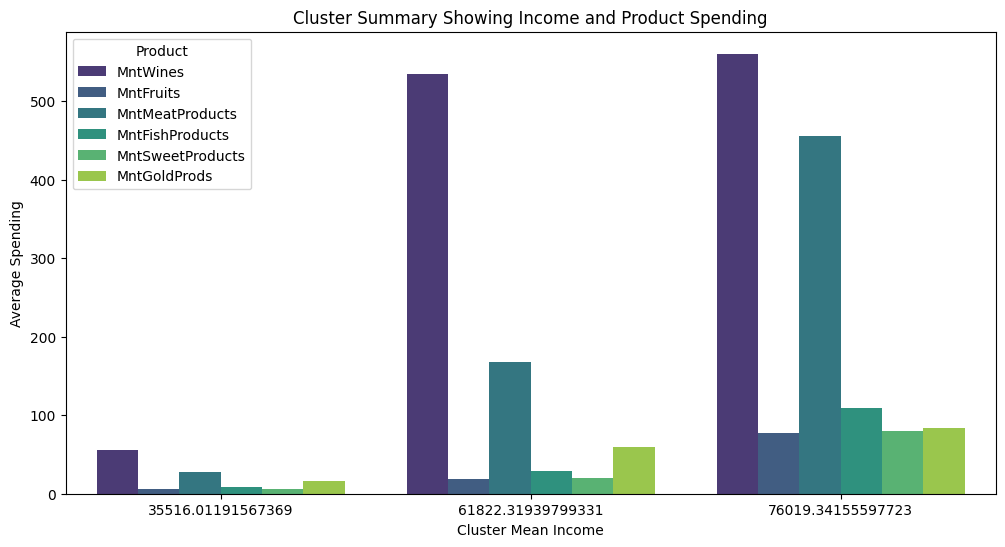

In [ ]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=pivot_cluster, x="Income", y="TotalSales", hue="Product", palette="viridis")

# Customize the plot
plt.title("Cluster Summary Showing Income and Product Spending")
plt.xlabel("Cluster Mean Income")
plt.ylabel("Average Spending")
plt.legend(title="Product")
plt.show()

In [ ]:
#Use Multi-Output Regression Model to classify and predict a customer's product spending
classify_pd = data_pd[['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

#One-hot encoding for non-numerical columns (not accepted by the model)
classify_pd = pd.get_dummies(classify_pd, columns=['Marital_Status', 'Education'], drop_first=True)

In [ ]:
#Define X as features (customer description) and y as targets (product columns)

#To get the customer description, drop their spending on products -- their marital_status, education, birthyear, etc. shall be retained
X = classify_pd.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1)
y = classify_pd[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [ ]:
#Use 30% as test data, 70% as training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict spending on the test set
y_pred = model.predict(X_test)

In [ ]:
# Determine the importance of each customer description to the products
feature_importances = {}
individual_feature_importance_list = []
overall_feature_importances = {feature: 0 for feature in X.columns}

# Loop through each target model and get feature importances
for i, target in enumerate(y.columns):
    # Get feature importances from the individual model for each target
    importances = model.estimators_[i].feature_importances_

    # Store the importances in the dictionary
    feature_importances[target] = dict(zip(X.columns, importances))
    for feature, importance in zip(X.columns, importances):
        overall_feature_importances[feature] += importance

# Average the feature importances by dividing by the number of targets
num_targets = len(y.columns)
for feature in overall_feature_importances:
    overall_feature_importances[feature] /= num_targets

# Display feature importances for each target
for target, importances in feature_importances.items():
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
    for feature, importance in sorted_importances:
        # Append as a dictionary to the list, specifying the target, feature, and its importance
        individual_feature_importance_list.append({"Target": target, "Feature": feature, "Importance": importance})

individual_feature_importance_df = pd.DataFrame(individual_feature_importance_list)
display(individual_feature_importance_df)

# For overall importances
sorted_overall_importances = sorted(overall_feature_importances.items(), key=lambda x: x[1], reverse=True)
overall_feature_importance_df = pd.DataFrame(sorted_overall_importances, columns=["Feature", "Importance"])

display(overall_feature_importance_df)

,Target,Feature,Importance
0,MntWines,Income,0.671404
1,MntWines,Recency,0.090307
2,MntWines,Year_Birth,0.086636
3,MntWines,Teenhome,0.049924
4,MntWines,Kidhome,0.021616
...,...,...,...
91,MntGoldProds,Marital_Status_Widow,0.007216
92,MntGoldProds,Marital_Status_Single,0.007059
93,MntGoldProds,Education_Basic,0.000652
94,MntGoldProds,Marital_Status_Alone,0.000003


,Feature,Importance
0,Income,6.795155e-01
1,Recency,9.747657e-02
2,Year_Birth,7.693038e-02
3,Teenhome,3.248778e-02
4,Kidhome,2.425032e-02
5,Education_PhD,2.110033e-02
6,Marital_Status_Married,1.431617e-02
7,Marital_Status_Together,1.105682e-02
8,Education_Graduation,1.078788e-02
9,Marital_Status_Divorced,1.036905e-02


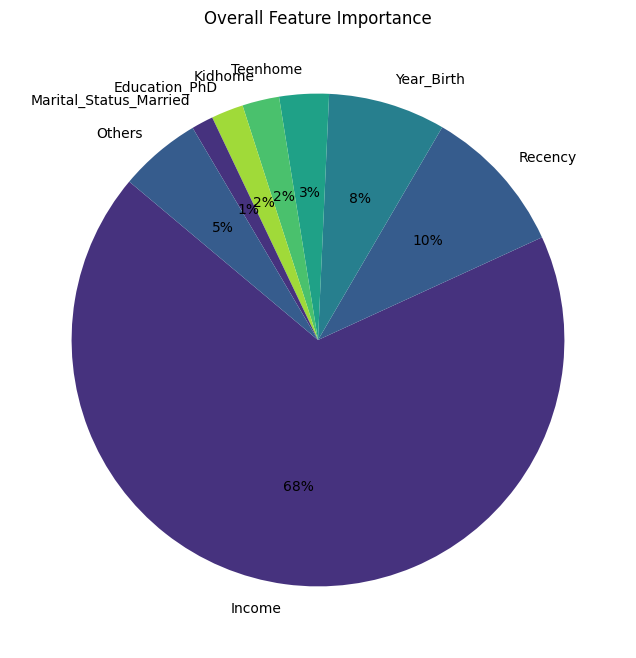

In [ ]:
#create pie chart for the overall feature importance

# Threshold for small values
threshold = 0.012

# Filter categories based on threshold
filtered_data = overall_feature_importance_df[overall_feature_importance_df["Importance"] >= threshold]

# Optionally add an "Others" category if there are values below the threshold
if len(overall_feature_importance_df[overall_feature_importance_df["Importance"] < threshold]) > 0:
    others_sum = overall_feature_importance_df[overall_feature_importance_df["Importance"] < threshold]["Importance"].sum()
    # Create a DataFrame for the "Others" row with explicit label
    others_row = pd.DataFrame({"Feature": "Others", "Importance": [others_sum]})
    filtered_data = pd.concat([filtered_data, others_row], ignore_index=True)

plt.figure(figsize=(8, 8))
plt.pie(filtered_data['Importance'], labels=filtered_data['Feature'], autopct='%1.0f%%', startangle=140, colors=sns.color_palette('viridis'))

plt.title('Overall Feature Importance')
plt.show()

In [ ]:
#decode the columns
X_test['Marital_Status'] = X_test[ ['Marital_Status_YOLO', 'Marital_Status_Together', 'Marital_Status_Married', 'Marital_Status_Widow', 'Marital_Status_Divorced',
     'Marital_Status_Alone', 'Marital_Status_Single']].idxmax(axis=1).str.replace('Marital_Status_', '')
X_test['Education'] = X_test[['Education_PhD', 'Education_Master', 'Education_Graduation', 'Education_Basic']].idxmax(axis=1).str.replace('Education_', '')

# Drop the one-hot encoded columns
X_test = X_test.drop(['Marital_Status_YOLO', 'Marital_Status_Together', 'Marital_Status_Married', 'Marital_Status_Widow', 'Marital_Status_Divorced',
                                        'Marital_Status_Alone', 'Marital_Status_Single',
                                        'Education_PhD', 'Education_Master', 'Education_Graduation', 'Education_Basic'], axis=1)


In [ ]:
# Column names for reference
target_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
mae_list = []
mae_per_column = []
results_list = []

for i in range(len(y_test)):
    data_point_result = {'Data_Point': i + 1}

    # Add the feature data for this data point
    data_point_result.update(X_test.iloc[i].to_dict())

    for j, col in enumerate(target_columns):
        # Use .iloc to access data by position for y_test and y_pred
        actual = y_test.iloc[i, j]
        predicted = y_pred[i, j]

        # Explicitly use the built-in Python abs function
        absolute_error = __builtins__.abs(actual - predicted)
        mae_list.append(absolute_error)

        # Store actual, predicted, Absolute Error, and MAPE for each target
        data_point_result[f"{col}_Actual"] = actual
        data_point_result[f"{col}_Predicted"] = predicted
        data_point_result[f"{col}_Absolute_Error"] = absolute_error

    # Append this data point's results to the list
    results_list.append(data_point_result)

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
results_df = results_df[['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education', 'Income', 'Recency',
                   'MntWines_Predicted', 'MntWines_Actual', 'MntWines_Absolute_Error',
                   'MntFruits_Predicted', 'MntFruits_Actual', 'MntFruits_Absolute_Error',
                   'MntMeatProducts_Predicted', 'MntMeatProducts_Actual', 'MntMeatProducts_Absolute_Error',
                   'MntFishProducts_Predicted', 'MntFishProducts_Actual', 'MntFishProducts_Absolute_Error',
                   'MntSweetProducts_Predicted', 'MntSweetProducts_Actual', 'MntSweetProducts_Absolute_Error',
                   'MntGoldProds_Predicted', 'MntGoldProds_Actual', 'MntGoldProds_Absolute_Error']]
display(results_df)

,Year_Birth,Marital_Status,Kidhome,Teenhome,Education,Income,Recency,MntWines_Predicted,MntWines_Actual,MntWines_Absolute_Error,...,MntMeatProducts_Absolute_Error,MntFishProducts_Predicted,MntFishProducts_Actual,MntFishProducts_Absolute_Error,MntSweetProducts_Predicted,MntSweetProducts_Actual,MntSweetProducts_Absolute_Error,MntGoldProds_Predicted,MntGoldProds_Actual,MntGoldProds_Absolute_Error
0,1962,Single,0,1,PhD,52597.0,69,612.57,492.0,120.57,...,74.27,15.43,7.0,8.43,11.90,0.0,11.90,57.28,42.0,15.28
1,1986,Together,1,0,PhD,34320.0,66,39.11,4.0,35.11,...,29.93,8.86,3.0,5.86,7.94,0.0,7.94,34.85,0.0,34.85
2,1972,Single,1,1,PhD,38578.0,2,77.57,38.0,39.57,...,14.11,4.92,3.0,1.92,2.51,3.0,0.49,12.48,3.0,9.48
3,1989,Married,1,0,Graduation,75433.0,28,645.42,800.0,154.58,...,137.50,103.64,0.0,103.64,53.80,34.0,19.80,62.43,57.0,5.43
4,1982,Married,1,0,Graduation,22448.0,86,12.29,3.0,9.29,...,8.95,5.80,23.0,17.20,3.71,2.0,1.71,13.25,18.0,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1987,Single,0,0,Master,41020.0,68,121.43,112.0,9.43,...,58.81,63.07,7.0,56.07,32.72,7.0,25.72,40.42,36.0,4.42
661,1960,Divorced,0,0,Master,39228.0,1,125.68,7.0,118.68,...,99.79,41.71,0.0,41.71,22.63,3.0,19.63,51.51,3.0,48.51
662,1987,Single,0,0,PhD,95169.0,1,658.56,1285.0,626.44,...,34.15,65.77,106.0,40.23,75.18,20.0,55.18,52.76,20.0,32.76
663,1972,Divorced,1,0,Graduation,26759.0,65,8.25,25.0,16.75,...,3.60,3.58,8.0,4.42,3.14,5.0,1.86,8.88,2.0,6.88


In [ ]:
#pivot for scatterplot
melted_df = results_df.melt(
    id_vars=['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education', 'Income', 'Recency'],
    value_vars=[
        'MntWines_Predicted', 'MntWines_Actual',
        'MntFruits_Predicted', 'MntFruits_Actual',
        'MntMeatProducts_Predicted', 'MntMeatProducts_Actual',
        'MntFishProducts_Predicted', 'MntFishProducts_Actual',
        'MntSweetProducts_Predicted', 'MntSweetProducts_Actual',
        'MntGoldProds_Predicted', 'MntGoldProds_Actual'
    ],
    var_name='Category_Variable', value_name='Value'
)

# Split `Category_Variable` into `Category` and `Type` (Predicted, Actual, Absolute_Error)
melted_df['Category'] = melted_df['Category_Variable'].apply(lambda x: x.split('_')[0])
melted_df['Type'] = melted_df['Category_Variable'].apply(lambda x: x.split('_')[1])

# Pivot the melted DataFrame to get Actual and Predicted columns
pivoted_df = melted_df.pivot_table(index=['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education', 'Income', 'Recency','Category'],
                                   columns='Type', values='Value').reset_index()

# Displaying the final DataFrame with separate columns for Actual, Predicted, and Absolute_Error
display(pivoted_df)

Type,Year_Birth,Marital_Status,Kidhome,Teenhome,Education,Income,Recency,Category,Actual,Predicted
0,1941,Married,0,0,PhD,93027.0,77,MntFishProducts,55.0,76.47
1,1941,Married,0,0,PhD,93027.0,77,MntFruits,42.0,52.38
2,1941,Married,0,0,PhD,93027.0,77,MntGoldProds,21.0,58.51
3,1941,Married,0,0,PhD,93027.0,77,MntMeatProducts,716.0,486.33
4,1941,Married,0,0,PhD,93027.0,77,MntSweetProducts,0.0,72.92
...,...,...,...,...,...,...,...,...,...,...
3883,1992,Together,0,0,Master,42670.0,12,MntFruits,2.0,24.44
3884,1992,Together,0,0,Master,42670.0,12,MntGoldProds,15.0,59.47
3885,1992,Together,0,0,Master,42670.0,12,MntMeatProducts,46.0,102.83
3886,1992,Together,0,0,Master,42670.0,12,MntSweetProducts,4.0,22.66


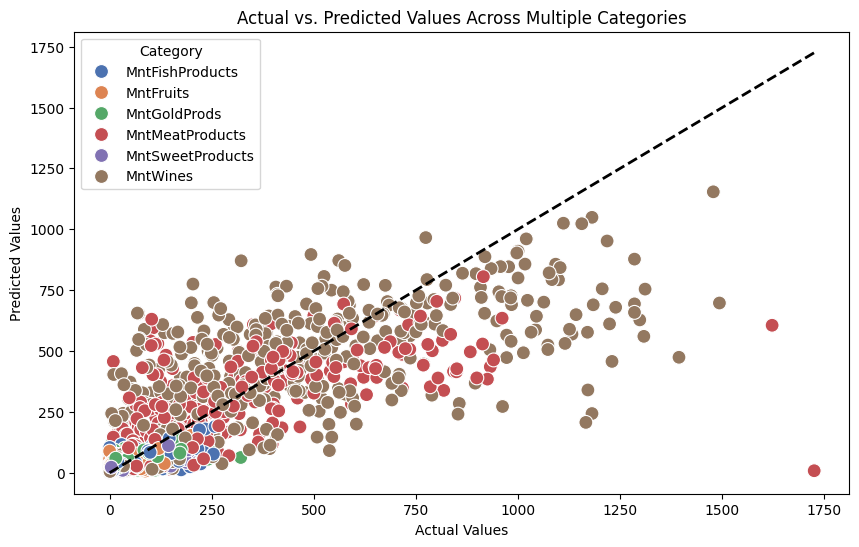

In [ ]:
# Scatterplot for actual vs predicted values for each category
# Scatter Plot: Show actual vs. predicted values, with a reference line.
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Actual", y="Predicted", hue="Category", data=pivoted_df, s=100, palette="deep")

# Adding a reference line for perfect prediction
plt.plot([pivoted_df["Actual"].min(), pivoted_df["Actual"].max()],
         [pivoted_df["Actual"].min(), pivoted_df["Actual"].max()], 'k--', lw=2)

# Adding titles and labels
plt.title("Actual vs. Predicted Values Across Multiple Categories")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

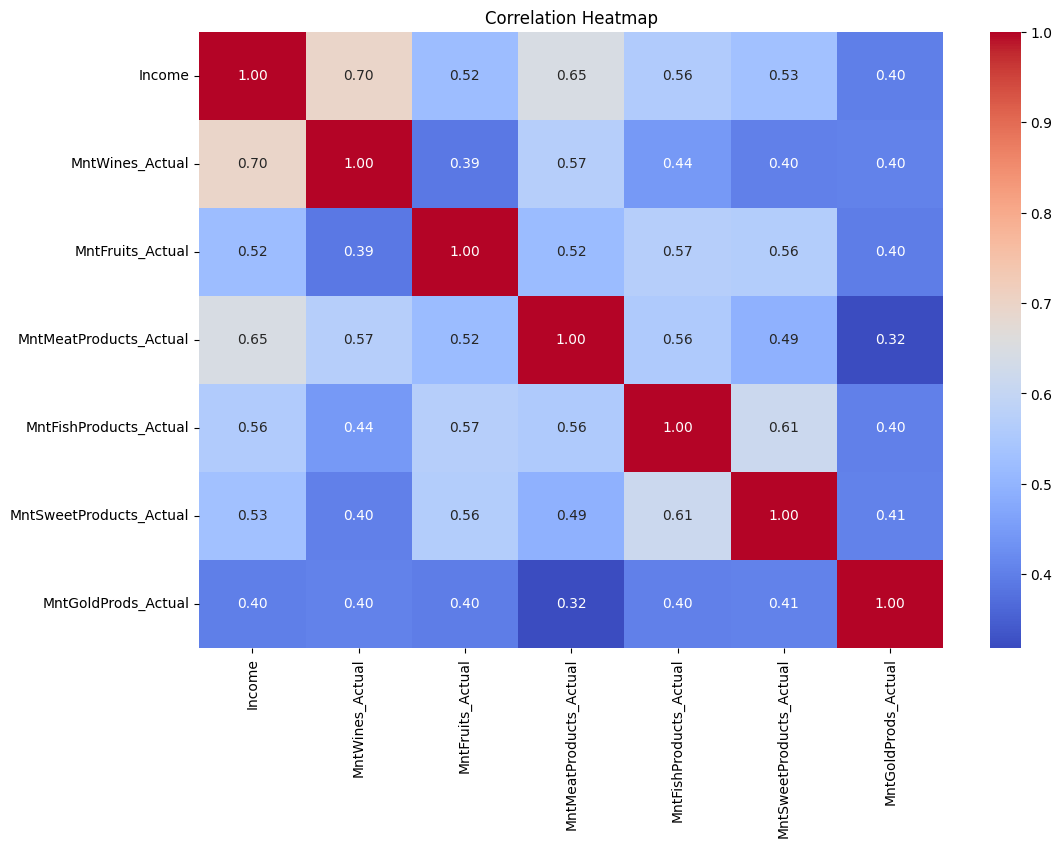

In [ ]:
#Using correlation heatmap on income and products actual values
# Red: High positive correlation -> Variables increase together
# Blue: High negative correlation -> One variable increases while the other decreases
feature_columns = ['Income']
target_columns = ['MntWines_Actual', 'MntFruits_Actual', 'MntMeatProducts_Actual', 'MntFishProducts_Actual', 'MntSweetProducts_Actual', 'MntGoldProds_Actual']

# Calculate the correlation matrix
correlation_matrix = results_df[feature_columns + target_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

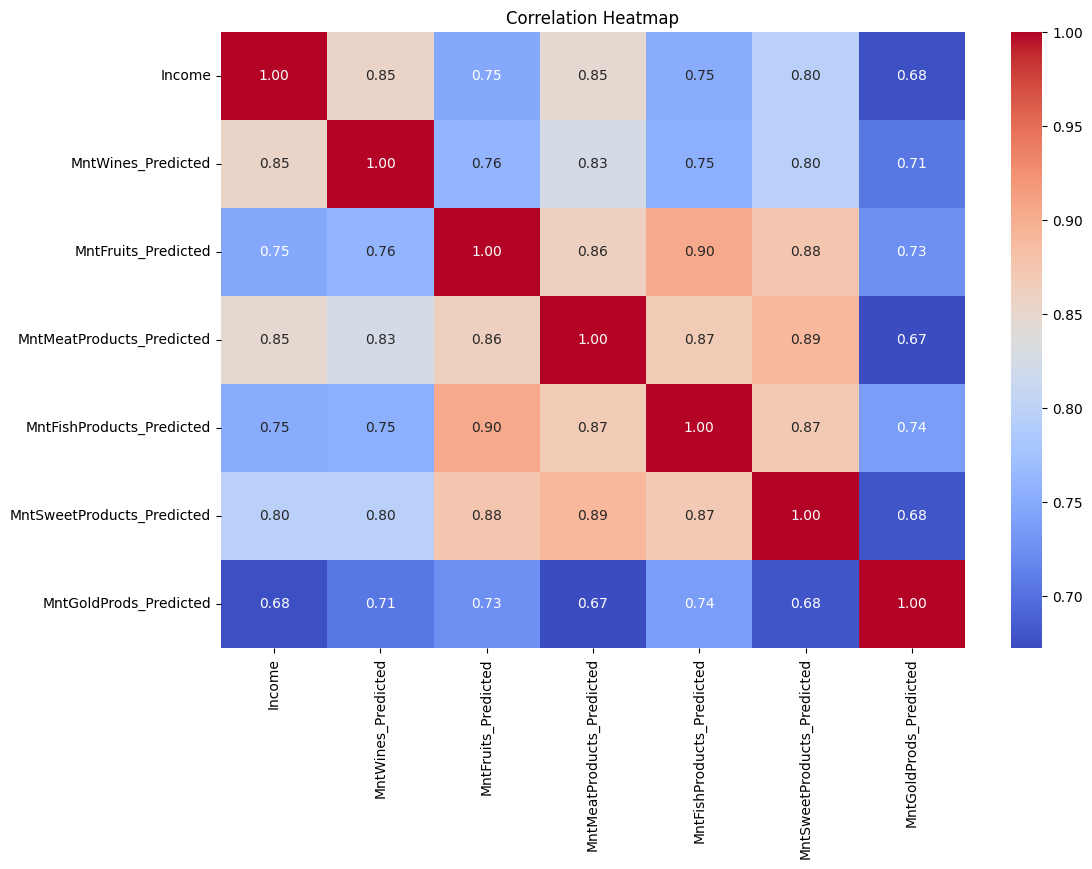

In [ ]:
#Using correlation heatmap on income and products predicted values
feature_columns = ['Income']
target_columns = ['MntWines_Predicted', 'MntFruits_Predicted', 'MntMeatProducts_Predicted', 'MntFishProducts_Predicted', 'MntSweetProducts_Predicted', 'MntGoldProds_Predicted']

# Calculate the correlation matrix
correlation_matrix = results_df[feature_columns + target_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Calculate the Mean Absolute Error for each target variable
#Lower MAE is better, higher MAE indicates more error
mae_wines = mean_absolute_error(y_test['MntWines'], y_pred[:, 0])
mae_fish = mean_absolute_error(y_test['MntFishProducts'], y_pred[:, 1])
mae_meat = mean_absolute_error(y_test['MntMeatProducts'], y_pred[:, 2])
mae_sweets = mean_absolute_error(y_test['MntSweetProducts'], y_pred[:, 3])
mae_fruits = mean_absolute_error(y_test['MntFruits'], y_pred[:, 4])
mae_gold = mean_absolute_error(y_test['MntGoldProds'], y_pred[:, 5])
average_mae = (mae_wines + mae_fish + mae_meat + mae_sweets + mae_fruits + mae_gold) / 6

# Store MAE values in a dictionary
mae_values = {
    "MntWines": mae_wines,
    "MntFishProducts": mae_fish,
    "MntMeatProducts": mae_meat,
    "MntSweetProducts": mae_sweets,
    "MntFruits": mae_fruits,
    "MntGoldProds": mae_gold,
    "Overall MAE": average_mae
}

mae_df = pd.DataFrame(list(mae_values.items()), columns=["Category", "MAE"])
display(mae_df)

,Category,MAE
0,MntWines,137.574812
1,MntFishProducts,26.036842
2,MntMeatProducts,76.348752
3,MntSweetProducts,24.514707
4,MntFruits,18.513383
5,MntGoldProds,29.625368
6,Overall MAE,52.102311


In [ ]:
target_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
accuracy_data = []
weighted_accuracy_sum = 0
total_weight = 0

# Calculate and print percentage accuracy for each category
for col in target_columns:
    # Average actual value for the category
    avg_actual = y_test[col].mean()

    # Calculate percentage accuracy
    percentage_accuracy = (1 - (mae_values[col] / avg_actual)) * 100
    accuracy_data.append({"Category": col, "Percentage Accuracy": percentage_accuracy})

    # Add to the weighted accuracy sum and total weight
    weighted_accuracy_sum += percentage_accuracy * avg_actual
    total_weight += avg_actual

# Calculate the overall percentage accuracy across all categories
overall_percentage_accuracy = weighted_accuracy_sum / total_weight
accuracy_data.append({"Category": "Overall Percentage Accuracy", "Percentage Accuracy": overall_percentage_accuracy})

# Convert accuracy data to DataFrame
accuracy_df = pd.DataFrame(accuracy_data)
display(accuracy_df)

,Category,Percentage Accuracy
0,MntWines,56.282673
1,MntFruits,23.365079
2,MntMeatProducts,53.917023
3,MntFishProducts,33.045244
4,MntSweetProducts,8.721837
5,MntGoldProds,32.044876
6,Overall Percentage Accuracy,49.074589


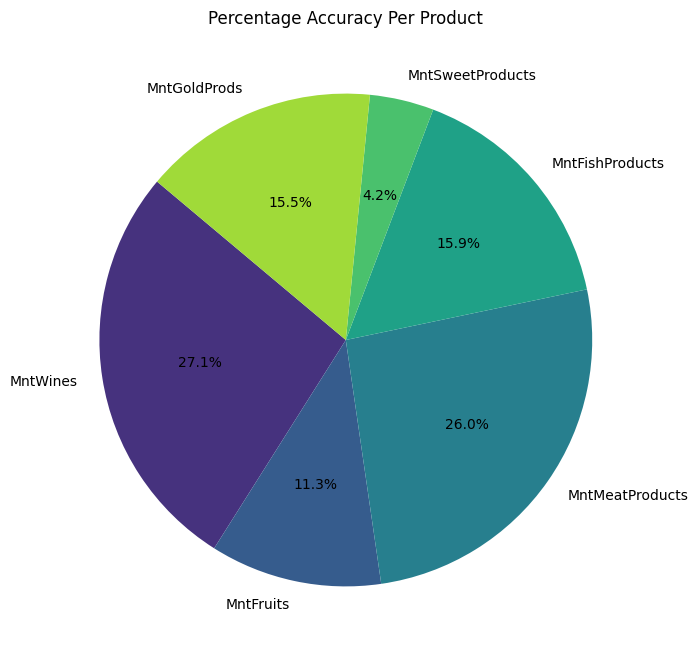

In [ ]:
prod_acc_df = accuracy_df[accuracy_df['Category'].isin(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])]
plt.figure(figsize=(8, 8))
plt.pie(prod_acc_df['Percentage Accuracy'], labels=prod_acc_df['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))

plt.title('Percentage Accuracy Per Product')
plt.show()